In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Importing connection dependencies + config
import psycopg2
import config as creds
# def connect():
    # Set up a connection to the postgres server.
conn_string = "host="+ creds.PGHOST +" port="+ "5432" +" dbname="+ creds.PGDATABASE +" user=" + creds.PGUSER \
              +" password=" + creds.PGPASSWORD
conn = psycopg2.connect(conn_string)
print("Connected!")
# Create a cursor object
cursor = conn.cursor()
# return conn, cursor

Connected!


In [3]:
# conn.close()

In [3]:
# Import preprocessed (reduced, encoded, etc) data
# Table Name = ml_table
cursor.execute("SELECT * FROM ml_table")


data = cursor.fetchall()

# Create a dataframe
cols = []
for elt in cursor.description:
    cols.append(elt[0])
        
health_df = pd.DataFrame (data=data,columns=cols)
pd.set_option('display.max_columns', None)
health_df.sample(10)

,GENHLTH,MENTHLTH,PHYSHLTH,SEX,MARITAL_STATUS,EDUCATION,HOME_STATUS,VETERAN,EMPLOYMENT_SITUATION,INTERNET,DISABILITIES?,USEEQUIP,BLIND,ISSUES_DECISION_MAING,DIFFWALK,DIFFDRES,DIFFALON,HEALTHY_ADULTS,HEALTH_CVRAGE,DIABETE3,BLOOD_PRESSURE,_CHOLCHK,HIGH_CHOLESTEROL,CORONARY_DISEASE,ASTHMA_DISEASE,_ASTHMS1,HAS_ARTHRITIS,RACE,AGE_14LEVEL,BMI,4_BMI,CHILDREN2,EDUCATION_LEVEL,INCOME2,DRINKS_WEEK,HEAVY_DRINKER,FRUIT_CONSUMPTION,VEGGIE_COSUMPTION,PHYS_ACTIVITY_MINS,PHYS_CATEGORIES,PHYS_ACT_INDX,AER_STRGTH
80042,1,88,88,1,1,4,2,1,1,1,1,2,2,2,1,2,2,1,1,3,1,1,1,2,1,3,2,1,3,2434,2,2,2,5,700.0,1,1,1,90.0,3,2,3
184051,2,88,25,2,1,5,1,2,7,1,2,2,2,2,2,2,2,1,99,2,2,1,1,2,1,3,1,1,10,2542,3,1,3,4,400.0,1,1,1,600.0,1,1,2
136162,5,88,30,1,1,5,2,2,8,2,1,2,1,7,2,2,2,2,1,1,2,1,1,1,1,3,1,3,99,2363,2,2,3,2,0.0,1,1,1,2100.0,1,1,2
119093,4,88,88,2,1,6,1,2,1,1,2,2,2,2,2,2,2,2,1,3,1,1,1,2,1,3,2,1,8,2439,2,2,4,5,0.0,1,1,1,600.0,1,1,2
80486,2,88,3,1,1,6,1,2,1,1,2,2,2,2,2,2,2,1,1,3,1,1,2,2,1,3,2,1,8,2439,2,1,4,5,467.0,1,1,1,90.0,3,2,4
134636,1,88,1,2,3,6,1,2,1,1,2,2,2,2,2,2,2,1,2,3,1,1,1,2,2,2,2,1,8,2832,3,1,4,5,0.0,1,2,1,98.0,3,2,4
155095,1,88,88,1,1,6,1,2,1,1,2,2,2,2,2,2,2,1,1,3,1,1,1,2,1,3,1,1,8,2311,2,1,4,99,560.0,1,1,1,420.0,1,1,2
76405,3,88,5,1,1,6,1,2,1,1,2,2,2,2,2,2,2,1,1,3,2,1,2,1,1,3,2,1,99,3054,4,1,4,5,0.0,1,1,1,420.0,1,1,2
47804,2,88,88,1,2,6,1,2,1,1,2,2,2,2,2,2,2,1,1,3,1,1,1,2,1,3,2,1,5,2825,3,6,4,5,1400.0,1,1,1,1256.0,1,1,2
73429,2,88,88,2,1,5,1,2,7,1,2,2,2,2,2,2,2,1,1,3,2,1,1,2,1,3,2,1,99,4034,4,1,3,5,47.0,1,1,1,122.0,3,2,4


In [4]:
health_df['GENHLTH'].count()

health_df['SEX'].replace([1,2],['M','F'], inplace=True)

<AxesSubplot:xlabel='PHYSHLTH'>

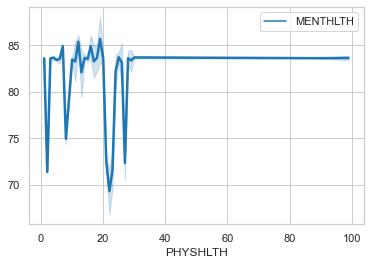

In [6]:
sns.set_theme(style='whitegrid')

line = health_df['PHYSHLTH']

values = health_df['MENTHLTH']

data = pd.DataFrame(values, line)

data= data.rolling(7).mean()

# Create Seaborn Line plot to determine basic levels of correlation between Mental health and General Health

sns.lineplot(data=data, palette='tab10', linewidth=2.5)

<AxesSubplot:xlabel='GENHLTH', ylabel='count'>

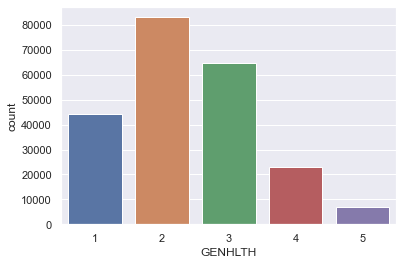

In [7]:
# Set seaborn style for dark background
sns.set(style="darkgrid")
GEN = health_df.GENHLTH[health_df.GENHLTH < 7]
# Plotting counts of General Health survey results (1-Excellent to 5 - Poor)

sns.countplot(x=GEN, data=health_df)

<AxesSubplot:xlabel='MENTHLTH', ylabel='count'>

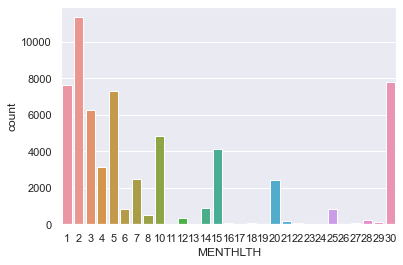

In [11]:
# Set seaborn style for dark background
sns.set(style="darkgrid")

# Clean data of irrelevant values
clean_ment = health_df.MENTHLTH[health_df.MENTHLTH < 66]

# Count plot for number of mental health problems experienced in a month

sns.countplot(x=clean_ment, data=health_df)



<AxesSubplot:xlabel='MENTHLTH', ylabel='GENHLTH'>

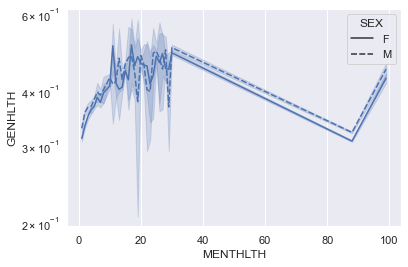

In [9]:
fig, ax = plt.subplots()

ax.set(yscale="log")

sns.lineplot(data=health_df, x="MENTHLTH", y="GENHLTH",ax=ax, style='SEX')

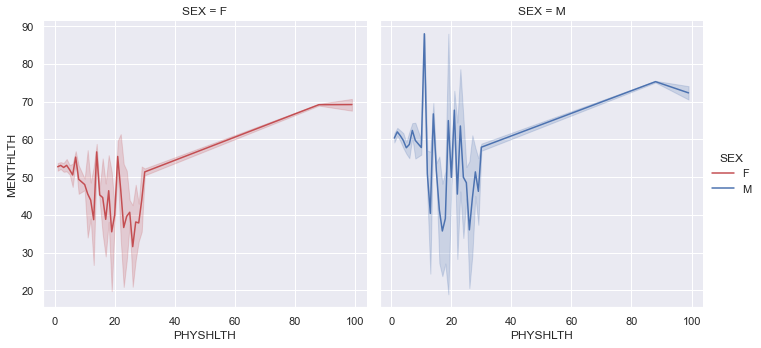

In [10]:
sns.relplot(
    data = health_df, x='PHYSHLTH', y='MENTHLTH',col='SEX',hue='SEX',kind='line', palette=['r','b'])

In [16]:
clean_df = pd.read_csv('Resources/2015_clean.csv')

In [17]:
clean_df.sample(10)

,_STATE,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,SEX,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3
308614,39,2.0,88.0,88,NaN,1,2,2.0,1,2.0,8.0,1.0,150.0,507.0
246195,31,3.0,88.0,2,88.0,1,1,2.0,1,1.0,4.0,1.0,169.0,509.0
68550,11,2.0,88.0,88,NaN,1,1,2.0,7,88.0,8.0,1.0,178.0,600.0
108854,18,1.0,5.0,10,2.0,1,2,2.0,2,1.0,8.0,1.0,140.0,507.0
266996,34,1.0,88.0,5,88.0,1,2,2.0,1,99.0,NaN,NaN,NaN,NaN
376663,49,3.0,4.0,5,88.0,1,1,1.0,1,88.0,99.0,1.0,230.0,600.0
251793,33,3.0,88.0,88,NaN,1,2,2.0,7,88.0,3.0,2.0,170.0,503.0
362894,48,3.0,30.0,88,30.0,1,1,2.0,7,88.0,4.0,1.0,280.0,509.0
204923,27,1.0,88.0,10,88.0,1,2,2.0,1,2.0,8.0,1.0,127.0,505.0
3203,1,1.0,5.0,88,88.0,1,2,2.0,5,88.0,99.0,1.0,163.0,504.0


In [18]:
# Making readable values for presentation purposes


clean_df['SEX'].replace([1,2],['M','F'], inplace=True)

clean_df['CHILDREN'].replace([88.0, 99.0], [0, 0], inplace=True)

clean_df['PHYSHLTH'].replace([88.0,77.0,99.0], [0,0,0], inplace=True)

clean_df['POORHLTH'].replace([88.0,77.0,99.0], [0,0,0], inplace=True)

clean_df['MENTHLTH'].replace([88.0,77.0], [0,0], inplace=True)

clean_df = clean_df[clean_df.MENTHLTH != 0]

clean_df.sample(10)

,_STATE,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,SEX,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3
419191,54,2.0,2.0,1,0.0,1,F,2.0,1,0.0,7.0,1.0,145.0,506.0
274501,36,5.0,30.0,20,30.0,1,M,2.0,7,0.0,8.0,1.0,150.0,510.0
132005,20,5.0,30.0,30,0.0,1,M,2.0,1,0.0,5.0,2.0,255.0,510.0
135735,20,4.0,30.0,6,15.0,1,M,2.0,7,0.0,2.0,1.0,180.0,508.0
115649,19,1.0,0.0,15,0.0,1,M,2.0,6,0.0,3.0,1.0,170.0,507.0
154928,23,2.0,0.0,2,0.0,1,F,2.0,7,0.0,6.0,2.0,113.0,504.0
327615,42,1.0,0.0,2,0.0,1,M,1.0,1,2.0,6.0,1.0,195.0,508.0
336541,45,5.0,30.0,30,28.0,1,F,2.0,8,0.0,3.0,1.0,220.0,502.0
136008,20,1.0,0.0,3,0.0,2,M,2.0,6,0.0,1.0,1.0,168.0,601.0
47179,8,2.0,14.0,14,10.0,1,F,2.0,7,0.0,77.0,1.0,192.0,504.0


In [19]:
poor_gen_hlth = clean_df[clean_df.GENHLTH == 5]

poor_gen_hlth.head()

,_STATE,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,SEX,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3
0,1,5.0,15.0,18,10.0,1,F,2.0,8,0.0,3.0,2.0,280.0,510.0
3,1,5.0,30.0,30,30.0,1,F,2.0,8,1.0,8.0,2.0,180.0,507.0
16,1,5.0,30.0,30,30.0,1,F,2.0,8,0.0,1.0,1.0,200.0,508.0
24,1,5.0,0.0,99,0.0,1,M,1.0,9,0.0,3.0,2.0,210.0,600.0
25,1,5.0,0.0,2,2.0,1,F,2.0,7,0.0,3.0,2.0,145.0,502.0


<AxesSubplot:xlabel='WEIGHT2'>

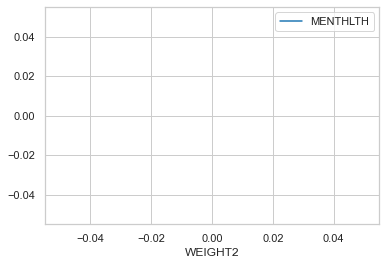

In [20]:
sns.set_theme(style='whitegrid')

line = poor_gen_hlth['WEIGHT2']

values = poor_gen_hlth['MENTHLTH']

data = pd.DataFrame(values, line)

data = data.rolling(7).mean()

# Create Seaborn Line plot to determine basic levels of correlation between Mental health and General Health

sns.lineplot(data=data, palette='tab10', linewidth=2.5)

In [37]:
# Dictionary for labeling states

states = {1:'AL',
2:'AK',
4:'AZ',
5:'AR',
6:'CA',
8:'CO',
9:'CT',
10:'DL',
11:'DC',
12:'FL',
13:'GA',
15:'HI',
16:'ID',
17:'IL',
18:'IN',
19:'IA',
20:'KS',
21:'KY',
22:'LA',
23:'ME',
24:'MD',
25:'MS',
26:'MI',
27:'MN',
28:'MS',
29:'MO',
30:'MT',
31:'NE',
32:'NV',
33:'NH',
34:'NJ',
35:'NM',
36:'NY',
37:'NC',
38:'ND',
39:'OH',
40:'OK',
41:'OR',
42:'PA',
44:'RI',
45:'SC',
46:'SD',
47:'TN',
48:'TX',
49:'UT',
50:'VT',
51:'VA',
53:'WA',
54:'WV',
55:'WI',
56:'WY',
66:'GU',
72:'PR'}
          


In [38]:
# replace state numbers with names

state_df = clean_df.replace({'_STATE': states})

state_df

,_STATE,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,SEX,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3
0,AL,5.0,15.0,18,10.0,1,F,2.0,8,0.0,3.0,2.0,280.0,510.0
3,AL,5.0,30.0,30,30.0,1,F,2.0,8,1.0,8.0,2.0,180.0,507.0
6,AL,2.0,0.0,3,0.0,1,F,2.0,7,0.0,4.0,2.0,148.0,506.0
16,AL,5.0,30.0,30,30.0,1,F,2.0,8,0.0,1.0,1.0,200.0,508.0
24,AL,5.0,N/A,99,N/A,1,M,1.0,9,0.0,3.0,2.0,210.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441434,PR,1.0,0.0,5,0.0,1,M,2.0,1,0.0,5.0,1.0,280.0,600.0
441436,PR,5.0,0.0,15,0.0,1,F,2.0,7,0.0,4.0,2.0,145.0,504.0
441441,PR,4.0,30.0,N/A,30.0,1,M,2.0,7,0.0,3.0,1.0,230.0,600.0
441448,PR,3.0,4.0,14,0.0,1,M,2.0,1,1.0,8.0,1.0,270.0,507.0
